### 신경망 모델 훈련


In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/ 255.0
train_scaled , val_scaled , train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer :
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model
            

In [4]:
model = model_fn()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
b = keras.layers.Dense(10 ,activation='sigmoid')
model1 = model_fn(b)

In [6]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
Total params: 79,620
Trainable params: 79,620
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target,epochs=5, verbose=0)

In [8]:
print(history.history.keys())
print(history.history['accuracy'])
print(history.history['loss'])


dict_keys(['loss', 'accuracy'])
[0.8142083287239075, 0.8588749766349792, 0.8715624809265137, 0.8804166913032532, 0.887624979019165]
[0.5286974906921387, 0.3914297819137573, 0.3540313243865967, 0.33194056153297424, 0.31510499119758606]


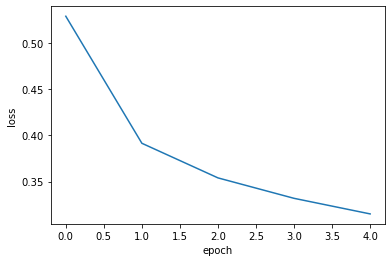

In [9]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

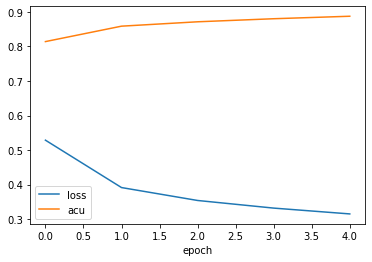

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss','acu'])
plt.show()

In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target))

In [12]:
print(history.history.keys())
print(history.history['val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.844083309173584, 0.8535833358764648, 0.8705000281333923, 0.8733333349227905, 0.874833345413208, 0.8759999871253967, 0.8775833249092102, 0.871999979019165, 0.8771666884422302, 0.8811666369438171, 0.8651666641235352, 0.8790000081062317, 0.8853333592414856, 0.8824166655540466, 0.8807500004768372, 0.8850833177566528, 0.871999979019165, 0.8826666474342346, 0.8845833539962769, 0.874916672706604]


- 검증 손실
   - 에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수뿐 만 아니라 검증세트에 대한 점수도 봐야함

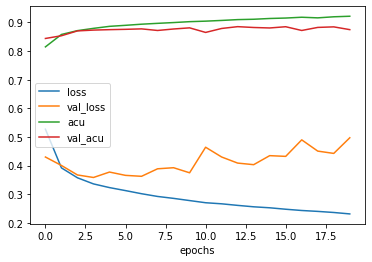

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.legend(['loss','val_loss','acu','val_acu'])
plt.show()

In [14]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/ 255.0
train_scaled , val_scaled , train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

- 과대적합을 막는 신경망에 특화된 규제 방법
   1. 옵티마이저 하이퍼 파라미터를 조정하여 과대적합 완화
       - 기본 RMSprop 옵티마이저는 많은 문제에서 잘 동작
       - 이 옵티마이저 대신 다른 옵티마이저를 테스트해 본다면 Adam이 가장 좋은 선택
       - Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정

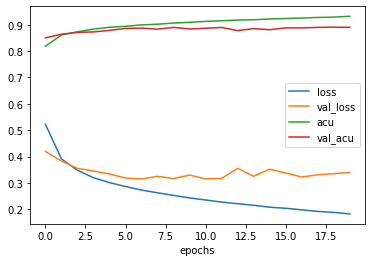

In [15]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target, epochs=20,verbose=0, validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.legend(['loss','val_loss','acu','val_acu'])
plt.show()

#### 드롭아웃(dropout) 딥러닝의 아버지라 불리는 제프리 힌턴이 소개
   - 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막음
      1. 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함
      2. 드롭아웃을 적용해 훈련하는 것이 2개의 신경망을 앙상블 하는 것처럼 상상할 수 있음
   - 케라스에서는 드롭아웃은  keras.layer 패키지 아래 Dropout 클래스로 제공함
   - 어떤 층의 뒤에 드롭아웃을 두어 층의 출력을 랜덤하게 0으로 만들고, 층으로 사용되지만 훈련
   - model_fn() 함수에 드롭아웃 객체를 전달하여 층을 추가하고, 30% 정도를 드롭아웃 함

- 콜백 (call back) : 케라스에서 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras, callbacks 패키지 아래에 있는 클래스로 fit()에 메서드의 callback 매개변수에 리스트로 전달하여 사용
- 적응률 학습률 (adaptive learning rate) : 모델이 최적점에 가까이 갈수록 안정적으로 수렴하도록 학습률을 낮추도록  조정하는 방법. 이런 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있는 것이 장점.
- 조기 종료

In [30]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/ 255.0
train_scaled , val_scaled , train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [34]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


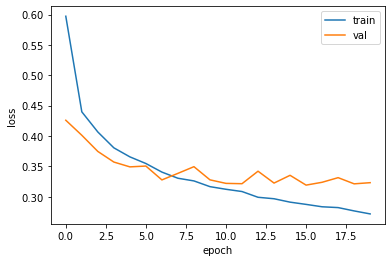

In [35]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled,val_target), verbose = 0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()



##### 모델 저장

In [ ]:
model.save_weights('model-weight.h5')
model.save('model-whole.h5')

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weight.h5')